In this notebook, we will compare the redshift evolution of a lightcone with that of a coeval box.

In [1]:
import postEoR.generation as gen
import numpy as np
import matplotlib.pyplot as plt
import postEoR.analysis as an

First, we generate an example box and an example cone, for use in our analysis.

In [9]:
nchunks=20
delta_z=30
HII_dim=100
box_size=200
max_rad=4
z=20

cone = gen.generate_cone(z_centr=z, HII_dim=HII_dim, box_size=box_size, delta_z=delta_z, max_rad=max_rad, nchunks=nchunks*10)

boxes=[]

redshifts = np.geomspace(z-delta_z/2, z+delta_z/2, nchunks+1)

for ii in range(nchunks):
    redshift = 0.5 * (redshifts[ii]+redshifts[ii+1])
    #redshift = z - delta_z / 2 + ii * delta_z / (nchunks-1)
    box = gen.generate_box(redshift, HII_dim=HII_dim, box_size=box_size, max_rad=max_rad)
    boxes.append(box)
    print("chunk "+str(ii))

inputs in
init conds in
box ran
Max BT value=2.08325
Optimal overdensity cap used is 0.64
10755
crit dens 5.8160395484597314e-27
min mass of cell before halos 948886972484.6735
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
chunk 0
inputs in
init conds in
box ran
Max BT value=7.914448
Optimal overdensity cap used is 0.64
9371
crit dens 5.8160395484597314e-27
min mass of cell before halos 948887524237.2734
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolv

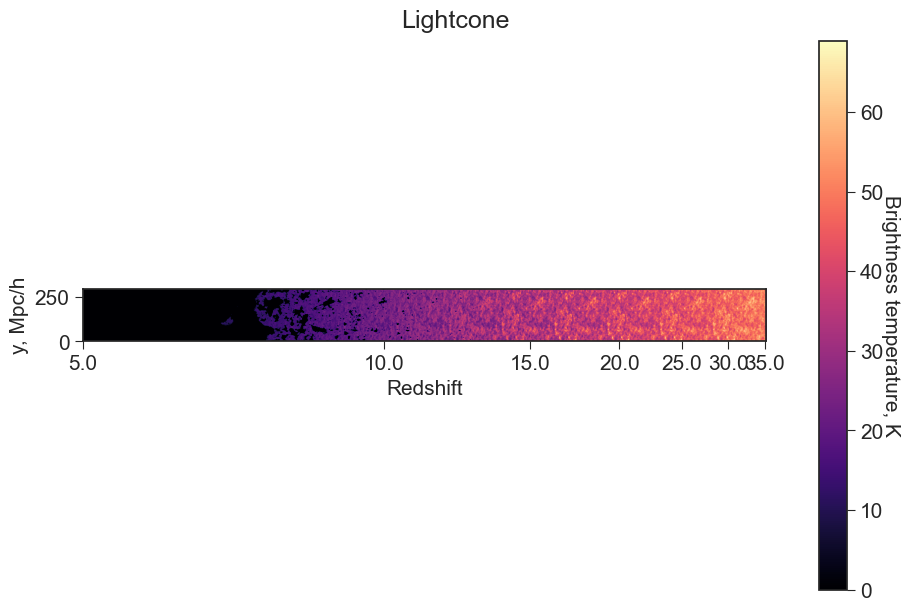

In [3]:
cone.plot_lightcone(cmap="magma")

For comparison, we need to split the lightcone up into 'chunks' centred around each redshift bin. We follow the example used in the 21cmFAST tutorial notebooks to divide the lightcone into its constituent chunks.


First, we compare the power spectrum outputs.

Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
Generated bins.
0.03288192495328633
Generated bins.
0.03288192495328633
Generated bins.
0.03288192495328633
Generated bins.
0.03288192495328633
Generated bins.
0.03288192495328633


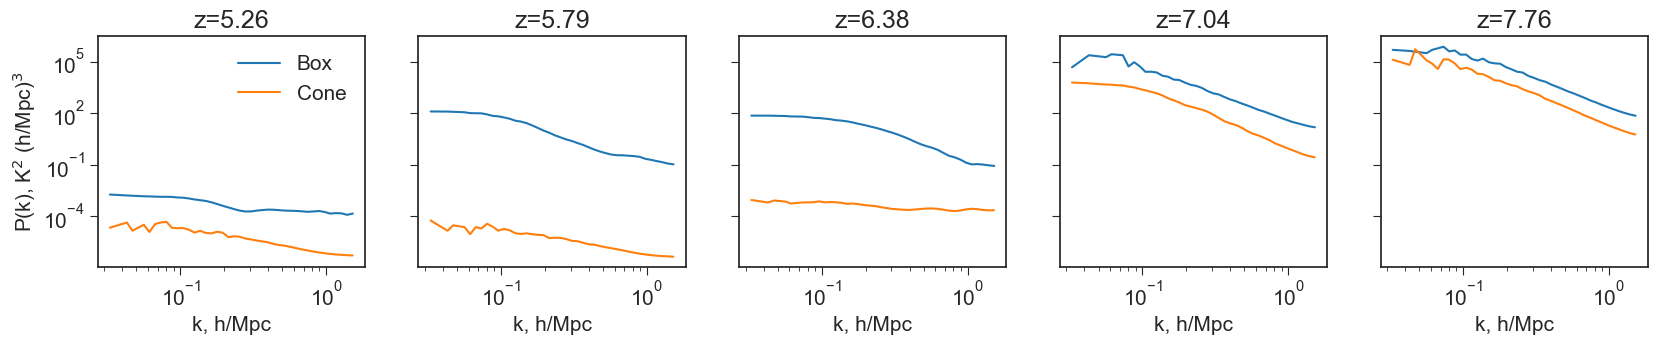

In [13]:
from importlib import reload
reload(an)

import postEoR.analysis as an

def powerspectra(
    cone, nchunks,
):  
    data=[]
    brightness_temp = cone.BT_field
    chunk_indices = list(
        range(
            0,
            np.shape(brightness_temp)[2],
            round(np.shape(brightness_temp)[2] / nchunks),
        )
    )

    if len(chunk_indices) > nchunks:
        chunk_indices = chunk_indices[:-1]
    chunk_indices.append(np.shape(brightness_temp)[2])

    for i in range(nchunks):
        start = chunk_indices[i]
        end = chunk_indices[i + 1]

        k, power, _ = an.get_PS(
            brightness_temp[:, :, start:end],
            cone.box_len, cone.HII_dim,
        )
        k = k[~np.isnan(power)]
        power = power[~np.isnan(power)]
        data.append({"k": k, "power": power})

    return data

nchunksplot = 5

fig, axs = plt.subplots(
    1,
    nchunksplot,
    sharey=True,
    figsize=(4 * (nchunksplot), 3),
)

PS=powerspectra(cone, nchunks)

for ii in range(nchunksplot):
    k, power, _ = an.get_PS(boxes[ii].BT_field, boxes[ii].box_len, boxes[ii].HII_dim)

    axs[ii].plot(
        k,
        power,
        color="tab:blue",
        label="Box" 
    )
    axs[ii].plot(
        PS[ii]["k"],
        PS[ii]["power"],
        color="tab:orange",
        label="Cone"
    )

    axs[ii].set_title("z="+str(format(0.5 * (redshifts[ii]+redshifts[ii+1]), '.2f')))
    axs[ii].set_yscale("log")
    axs[ii].set_xscale("log")
    axs[ii].set_xlabel("k, h/Mpc")

axs[0].legend()
axs[0].set_ylabel("P(k), K$^2$ (h/Mpc)$^3$")

plt.show()

Next, we compare the HMFs.

Text(0, 0.5, '$\\dfrac{dn}{d\\log M}$, (Mpc/h)$^{-3}$')

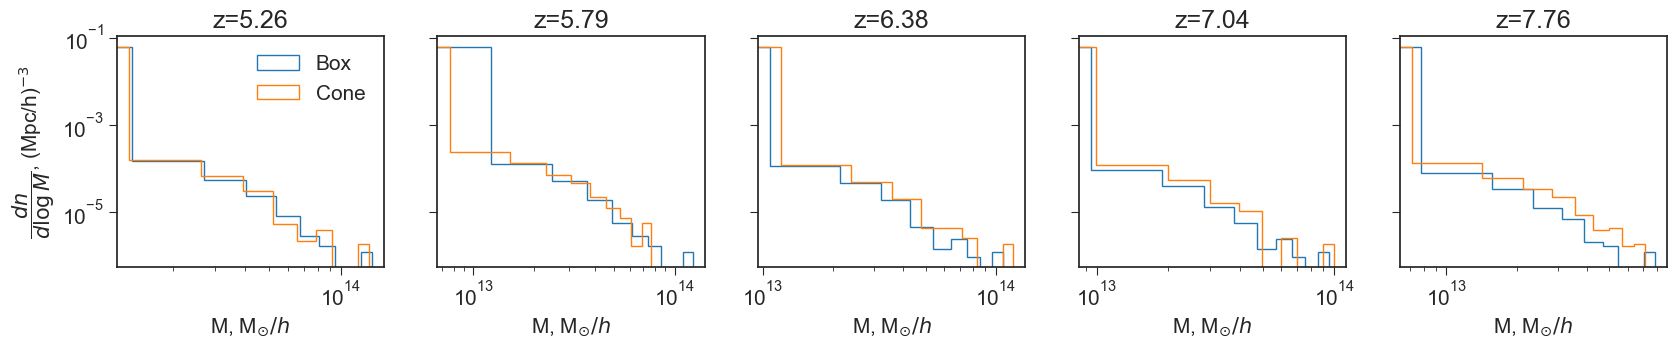

In [14]:
def get_hmf(halo_field, cell_size):
    counts, bins = np.histogram(halo_field)
    los_dist = cell_size * np.shape(halo_field)[2] # used for plotting
    bins_plot = (bins[1:] + bins[:-1]) / 2

    return bins_plot, counts, los_dist, bins

fig, axs = plt.subplots(
    1,
    nchunksplot,
    sharey=True,
    figsize=(4 * (nchunksplot), 3),
)
    

def halomassfunction(
    cone, nchunks,
):  
    data=[]
    halo_field=cone.halo_field
    chunk_indices = list(
        range(
            0,
            np.shape(halo_field)[2],
            round(np.shape(halo_field)[2] / nchunks),
        )
    )

    if len(chunk_indices) > nchunks:
        chunk_indices = chunk_indices[:-1]
    chunk_indices.append(np.shape(halo_field)[2])

    for i in range(nchunks):
        start = chunk_indices[i]
        end = chunk_indices[i + 1]

        bins_plot, counts, los_dist, bins = get_hmf(
            halo_field[:, :, start:end],
            cone.cell_size,
        )

        data.append({"bins_plot": bins_plot, "counts": counts, "los_dist": los_dist, "bins": bins})

    return data

HMF = halomassfunction(cone, nchunks)

for ii in range(nchunksplot):
    bins_plot, counts, los_dist, bins = get_hmf(boxes[ii].halo_field, boxes[ii].cell_size)
    axs[ii].hist(bins_plot, bins, weights=(0.5 * counts / ((bins[1:]-bins[:-1]) * boxes[ii].box_len**2 * los_dist) * (bins[1:]+bins[:-1])), histtype='step', color="tab:blue", label="Box")
    axs[ii].hist(HMF[ii]["bins_plot"], HMF[ii]["bins"], weights=(0.5 * HMF[ii]["counts"] / ((HMF[ii]["bins"][1:]-HMF[ii]["bins"][:-1]) * cone.box_len**2 * HMF[ii]["los_dist"]) * (HMF[ii]["bins"][1:]+HMF[ii]["bins"][:-1])), histtype='step', color="tab:orange", label="Cone")

    axs[ii].set_title("z="+str(format(0.5 * (redshifts[ii]+redshifts[ii+1]), '.2f')))
    axs[ii].set_yscale("log")
    axs[ii].set_xscale("log")
    axs[ii].set_xlabel('M, M$_{\odot}/h$')



axs[0].legend()
axs[0].set_ylabel('$\dfrac{dn}{d\log M}$, (Mpc/h)$^{-3}$')

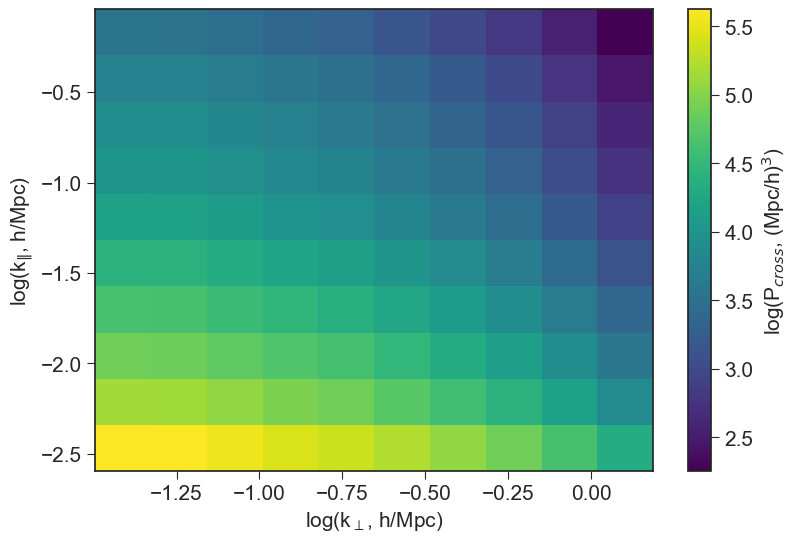

In [12]:
from importlib import reload
reload(an)

import postEoR.analysis as an

an.get_2d_ps(cone)